In [4]:
import numpy 
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

In [5]:
data = pd.read_csv('./train.csv', encoding='latin-1', delimiter=',', quotechar='"')
print(data.shape)
data.head()

(99781, 3)


,ItemID,Sentiment,SentimentText;;;;;;;;
0,1,0.0,is so sad for my APL frie...
1,2,0.0,I missed the New Moon trail...
2,3,1.0,omg its already 7:30 :O;;;;;;;;
3,4,0.0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0.0,i think mi bf is cheating on me!!! ...


In [36]:
data = data.dropna()

In [37]:
# Obtener la distribución de clases
class_distribution = data['Sentiment'].value_counts()

# Imprimir la distribución de clases
print(class_distribution)

1.0    41615
0.0    33424
Name: Sentiment, dtype: int64


In [38]:
minority_class_size = min(class_distribution)

# Undersampling de la clase mayoritaria
undersampled_df = pd.concat([
    data[data['Sentiment'] == 0],
    data[data['Sentiment'] == 1].sample(minority_class_size, replace=True)
])

new_class_distribution = undersampled_df['Sentiment'].value_counts()

In [39]:
data = undersampled_df

In [40]:
class_distribution = data['Sentiment'].value_counts()

In [41]:
class_distribution

0.0    33424
1.0    33424
Name: Sentiment, dtype: int64

In [42]:
data =  data.rename(columns={'SentimentText;;;;;;;;': 'SentimentText'})
data['Sentiment'] = data['Sentiment'].astype(int)


#Limpieza de textos

In [43]:
for index, row in data.iterrows():
    text = row['SentimentText']
    lower_case = text.lower()
    cleaned_text = lower_case.translate(
        str.maketrans('', '', string.punctuation))
    data.at[index, 'SentimentText'] = cleaned_text

data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my apl friend
1,2,0,i missed the new moon trailer
3,4,0,omgaga im sooo im gunna cry ive be...
4,5,0,i think mi bf is cheating on me tt
5,6,0,or i just worry too much


In [44]:
data.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

<h2>Modelo 1 - Regresión logística

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Dividir los datos en características (X) y etiquetas (y)
X = data['SentimentText']
y = data['Sentiment']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Crear y entrenar el modelo de Regresión Logística
logreg_model = LogisticRegression()
logreg_model.fit(X_train_vectorized, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logreg_model.predict(X_test_vectorized)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      6643
           1       0.79      0.81      0.80      6727

    accuracy                           0.79     13370
   macro avg       0.79      0.79      0.79     13370
weighted avg       0.79      0.79      0.79     13370



c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
text = "I can't believe how poorly this game is designed. The controls are clunky, the graphics are outdated, and the gameplay is incredibly boring. I regret wasting my money on it."
text = 'Im happy'
new_text_vectorized = vectorizer.transform([text])
predicted_sentiment = logreg_model.predict(new_text_vectorized)

print(predicted_sentiment)



[1]


<h2>Modelo 2 - SVM


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Dividir los datos en características (X) y etiquetas (y)
X = data['SentimentText']
y = data['Sentiment']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Crear y entrenar el modelo SVM
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_vectorized)

# Evaluar el desempeño del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83      6643
           1       0.83      0.83      0.83      6727

    accuracy                           0.83     13370
   macro avg       0.83      0.83      0.83     13370
weighted avg       0.83      0.83      0.83     13370



In [48]:
text = "I can't believe how poorly this game is designed. The controls are clunky, the graphics are outdated, and the gameplay is incredibly boring. I regret wasting my money on it."
text = 'Im happy'

# Aplicar el preprocesamiento y transformación de características
new_text_vectorized = vectorizer.transform([text])

# Realizar la predicción
prediction = svm_model.predict(new_text_vectorized)

# Imprimir la predicción
print(prediction)

[1]


<h2>Herramiente de NLTK


In [1]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer


In [6]:
data = [
    (0, "I'm feeling really down today."),
    (0, "This movie is terrible. I wouldn't recommend it."),
    (0, "I had a horrible experience at the restaurant. The service was awful."),
    (0, "I can't believe how disappointing this product is."),
    (0, "The weather is so gloomy and depressing."),
    (1, "I'm so happy that I got the job I wanted."),
    (1, "This book is amazing! I couldn't put it down."),
    (1, "I had a great time at the party. It was so much fun."),
    (1, "I love the new song by my favorite artist. It's so catchy."),
    (1, "I'm feeling grateful for all the good things in my life."),
    (0, "I'm tired of dealing with all the stress and negativity."),
    (0, "This news is really upsetting. It's hard to stay positive."),
    (0, "I'm frustrated with the constant problems at work."),
    (0, "I'm not enjoying this vacation as much as I thought I would."),
    (1, "I'm excited about the upcoming concert. It's going to be amazing."),
    (1, "I received some great news today. It made my day."),
    (1, "I'm grateful for the support and love from my friends and family."),
    (1, "I had a wonderful time exploring a new city."),
    (0, "I'm feeling overwhelmed with all the responsibilities."),
    (0, "This situation is really discouraging. I don't see a way out."),
    (1, "I achieved a personal milestone today. It feels incredible."),
    (1, "I love the feeling of accomplishing my goals."),
    (1, "I'm enjoying a relaxing day at the beach."),
    (1, "I received a heartfelt compliment that made my day."),
    (1, "I'm looking forward to spending time with loved ones this weekend."),
    (0, "I'm annoyed by the constant noise from construction outside."),
    (0, "I'm disappointed with the lack of progress in my project."),
    (0, "I'm upset about the traffic jam delaying my plans."),
    (0, "I'm frustrated with the long wait times at the customer service."),
    (0, "I'm feeling discouraged after receiving negative feedback."),
    (1, "I'm grateful for the beautiful sunset I witnessed today."),
    (1, "I enjoyed a delicious meal at my favorite restaurant."),
    (1, "I received a surprise gift that made me smile."),
    (1, "I'm excited about the upcoming vacation. It's going to be fantastic."),
    (1, "I'm proud of myself for completing a challenging task."),
    (0, "I'm feeling overwhelmed with the amount of work I have to do."),
    (0, "I'm disappointed with the quality of the product I purchased."),
    (0, "I'm frustrated with the constant interruptions at work."),
    (0, "I'm saddened by the loss of a loved one."),
    (0, "I'm irritated by the loud music coming from my neighbor's house."),
    (1, "I'm grateful for the support and encouragement from my friends."),
    (1, "I enjoyed a refreshing walk in nature today."),
    (1, "I received a promotion at work. It's a great achievement."),
    (1, "I'm looking forward to attending a concert tonight."),
    (1, "I had a fun time playing games with my friends."),
    (0, "I'm feeling stressed out due to a tight deadline."),
    (0, "I'm dissatisfied with the customer service I received."),
    (0, "I'm upset about the cancellation of my favorite TV show."),
    (0, "I'm frustrated with the constant delays in public transportation."),
    (0, "I'm feeling discouraged after facing a setback in my project."),
    (0, "I'm feeling really tired and unmotivated today."),
    (0, "This movie is absolutely terrible. It's a waste of time."),
    (0, "I had a terrible day at work. Everything went wrong."),
    (0, "I can't stand this constant negativity around me."),
    (0, "The rain ruined my plans for the day. It's so frustrating."),
    (1, "I'm thrilled about the exciting news I received."),
    (1, "This book is incredible! It kept me hooked until the end."),
    (1, "I had an amazing vacation. It was a memorable experience."),
    (1, "I'm in love with the new song by my favorite artist."),
    (1, "I feel blessed to have such supportive and loving friends."),
    (0, "I'm fed up with all the drama and conflicts in my life."),
    (0, "This news is devastating. It's hard to find any hope."),
    (0, "I'm frustrated with the lack of progress in my personal goals."),
    (0, "I'm not enjoying this party as much as I thought I would."),
    (1, "I'm excited to attend the music festival this weekend."),
    (1, "I received a wonderful surprise that brightened my day."),
    (1, "I'm grateful for the love and care I receive from my family."),
    (1, "I had an incredible adventure exploring a new city."),
    (0, "I'm overwhelmed with the amount of work piling up."),
    (0, "This situation seems hopeless. I don't see a way out."),
    (1, "I achieved a major milestone today. It feels amazing."),
    (1, "I love the sense of accomplishment when I reach my goals."),
    (1, "I'm enjoying a peaceful day at the beach."),
    (1, "I received a heartfelt compliment that made my day."),
    (1, "I'm looking forward to spending quality time with loved ones."),
    (0, "I'm annoyed by the constant noise from construction nearby."),
    (0, "I'm disappointed with the lack of support in my endeavors."),
    (0, "I'm upset about the traffic jam ruining my plans."),
    (0, "I'm frustrated with the unhelpful customer service."),
    (0, "I'm feeling demotivated after receiving negative feedback."),
    (1, "I'm grateful for the beautiful sunrise I witnessed today."),
    (1, "I enjoyed a delicious meal at a new restaurant."),
    (1, "I received a thoughtful gift that made me smile."),
    (1, "I'm excited about the upcoming vacation. It's going to be fantastic."),
    (1, "I'm proud of myself for overcoming a difficult challenge."),
    (0, "I'm feeling overwhelmed with the amount of work on my plate."),
    (0, "I'm disappointed with the quality of the product I bought."),
    (0, "I'm frustrated with the constant interruptions at work."),
    (0, "I'm saddened by the loss of a beloved pet."),
    (0, "I'm irritated by the loud noise from my neighbor's house."),
    (1, "I'm grateful for the support and encouragement from my friends."),
    (1, "I enjoyed a peaceful hike in nature today."),
    (1, "I received a promotion at work. It's a great achievement."),
    (1, "I'm looking forward to attending a concert tonight.")
]

data = pd.DataFrame(data, columns=['Sentiment', 'SentimentText'])

In [7]:
y_true = data['Sentiment']
y_pred = []
for row in data.iterrows():
    text = row[1][1]

    lower_case = text.lower()
    cleaned_text = lower_case.translate(
        str.maketrans('', '', string.punctuation))

    # Using word_tokenize because it's faster than split()
    tokenized_words = word_tokenize(cleaned_text, "english")

    # Removing Stop Words
    final_words = []
    for word in tokenized_words:
        if word not in stopwords.words('english'):
            final_words.append(word)

    # Lemmatization - From plural to single + Base form of a word (example better-> good)
    lemma_words = []
    for word in final_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)


    processed_text = ' '.join(lemma_words)
    score = SentimentIntensityAnalyzer().polarity_scores(processed_text)
    result = 1
    if score['neg'] > score['pos']:
        result = 0
    elif score['neg'] < score['pos']:
        result = 1
    y_pred.append(result)
y_true = y_true.values.tolist()

Precision: 0.8245614035087719
Recall: 1.0
F1-score: 0.9038461538461539


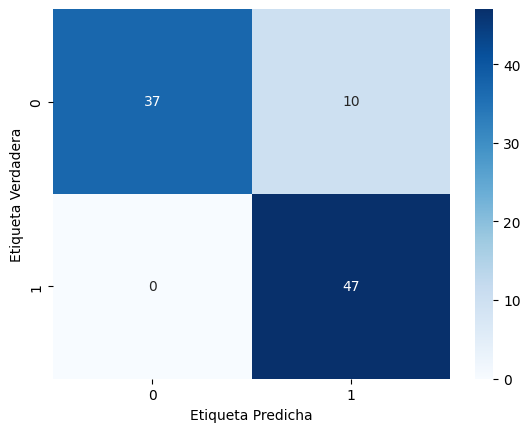

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Obtener las etiquetas verdaderas (y_true) y las etiquetas predichas (y_pred)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_true, y_pred)

# Obtener los valores de verdaderos positivos (TP), falsos positivos (FP), 
# verdaderos negativos (TN) y falsos negativos (FN) de la matriz de confusión
TP = confusion_mat[1][1]
FP = confusion_mat[0][1]
TN = confusion_mat[0][0]
FN = confusion_mat[1][0]

# Calcular las métricas de precisión, recall y F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Imprimir las métricas de desempeño
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# Crear un heatmap de la matriz de confusión utilizando seaborn
sns.heatmap(confusion_mat, annot=True, cmap="Blues")

# Configurar etiquetas de los ejes
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")

# Mostrar el heatmap
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
accuracy

0.8936170212765957